In [1]:
# CODE CELL BLOCK 1
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# CODE CELL BLOCK 2
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# CODE CELL BLOCK 3
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# CODE CELL BLOCK 4
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# CODE CELL BLOCK 5
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# CODE CELL BLOCK 6
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# CODE CELL BLOCK 7
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# CODE CELL BLOCK 8
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# CODE CELL BLOCK 9
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.datetime.strptime(most_recent_date[0], '%Y-%m-%d').date()

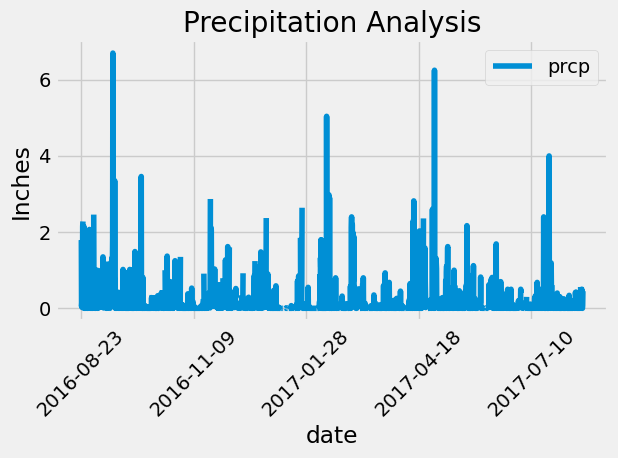

In [14]:
# CODE CELL BLOCK 10
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation_df.sort_values(by='date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(x='date', y='prcp', title="Precipitation Analysis")
plt.xticks(rotation=45)
plt.ylabel("Inches")
plt.tight_layout()
plt.show()

In [16]:
# CODE CELL BLOCK 11
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_summary = precipitation_df.describe()
precipitation_summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# CODE CELL BLOCK 12
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [22]:
# CODE CELL BLOCK 13
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_station = station_activity[0][0]

station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# CODE CELL BLOCK 14
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

most_active_temperatures

[(54.0, 85.0, 71.66378066378067)]

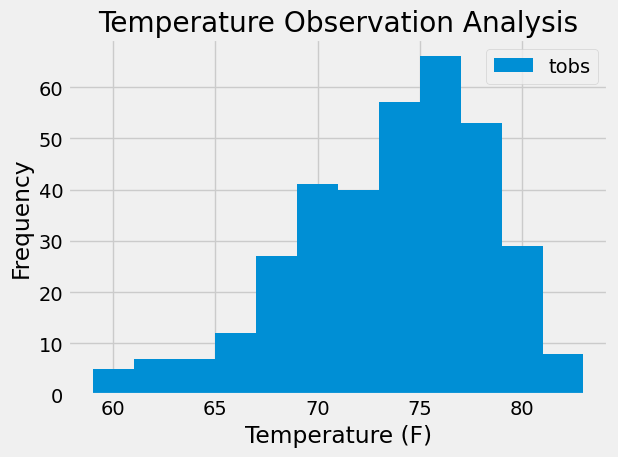

In [25]:
# CODE CELL BLOCK 15
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station, Measurement.date >= one_year_ago).all()

temperature_df = pd.DataFrame(temperature_data, columns=['tobs'])

temperature_df.plot.hist(bins=12, title="Temperature Observation Analysis")
plt.xlabel("Temperature (F)")
plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()